In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.shape

(42000, 785)

In [7]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9970,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import matplotlib.pyplot as plt

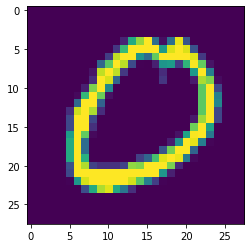

In [9]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [10]:
plt.imshow(df.iloc[df.sample(),1:].values.reshape(28,28))

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [16]:
df.iloc[:,0]

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [18]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X_train.shape

(33600, 784)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier()

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [24]:
knn.predict(X_test)

KeyboardInterrupt: 

In [25]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

454.04040789604187


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [ ]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf.shape

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_trf,y_train)

In [ ]:
y_pred = knn.predict(X_test_trf)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))
    

In [ ]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [ ]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
pca.explained_variance_
# Eigen values

In [ ]:
pca.components_.shape
# Eigen vectors

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
pca.explained_variance_.shape

In [ ]:
pca.components_.shape

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))